In [2]:
from Scripts import Trainings
from Scripts import Plotting
from Scripts import Computing_functions
import numpy as np
import timeit
import itertools
import importlib
import os
import glob
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import xarray as xr

In [11]:
for i in range(5):
    lines = []
    for j in range(2):
        lines.append(f'{i+j} \n')
    print(''.join(lines), end = '\r')
    

0 
1 
1 
2 
2 
3 
3 
4 
4 
5 


In [12]:
%load_ext tensorboard

In [13]:
tensorboard --logdir logs/fit

In [4]:
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']
Var_X1 = ['x', 'y', 'thermalDriving', 'halineDriving', 'iceDraft']
Var_X2 = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_non_position = ['temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_BIG = ['iceDraft', 'Slope_iceDraft', 'Slope_bathymetry', 'Distances', 'Big_T', 'Big_S']
Var_X_Extra = ['iceDraft', 'Slope_iceDraft', 'Slope_bathymetry', 'Distances', 'temperatureYZ', 'salinityYZ']
Var_X_BIG_test = ['iceDraft','Big_T', 'Big_S']
Var_X_BIG_Extra = ['iceDraft', 'bathymetry', 'Slope_iceDraft_x', 'Slope_bathymetry_x',
                   'Slope_iceDraft_y', 'Slope_bathymetry_y', 'Big_T', 'Big_S',
                  'Distances_ground_line', 'Distances_front_line']
Dataset = 'Ocean1'
Oc_mod_type = 'COM_NEMO-CNRS'
Bet_path = '/bettik/bouissob/'
D_path = os.path.join(Bet_path, 'Method_Data/COM_NEMO-CNRS/Method_4', 'Ocean4.csv')

In [6]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)

Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 1, Ocean_target = 'Ocean1', 
                NN_attributes = {'Epoch' : 6, 'Extra_n' : 'Same_ind', 'Neur' : '32_64_64_32' , 
                'Ocean' : OcT})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_6_N_32_64_64_32_Ch_0-1648499348_Ex_Same_ind']
Data variables used : temperatureYZ salinityYZ iceDraftx_Same_ind                                                   
Starting 47 / 239/rStarting 94 / 239/r

KeyboardInterrupt: 

Ben
['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1647892530_Ex_Same_ind']


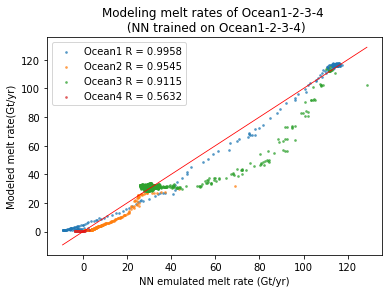

5.176324157677434


In [4]:
#Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 1, Ocean_target = 'Ocean3', 
#                NN_attributes = {'Epoch' : 6, 'Extra_n' : 'Same_ind', 'Neur' : '32_64_64_32' , 
#                'Ocean' : OcT})
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = True, 
            message = 0, Ocean_target = OcT, index = 0, NN_attributes = {'Epoch' : 8, 
                            'Extra_n' : 'Same_ind', 'Ocean' : OcT, 'Neur' : '0'})

Ben
['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648131277_Ex_Same_ind']


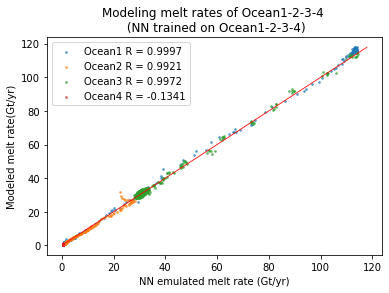

0.930941703130092


In [4]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False, 
            message = 0, Ocean_target = OcT, index = 1, NN_attributes = {'Epoch' : 8, 
            'Extra_n' : 'Same_ind', 'Ocean' : OcT, 'Neur' : '32_32_96_96', 'Method_data' : 4})

Ep_8_N_32_32_96_96_Ch_0-1648131277_Ex_Same_ind


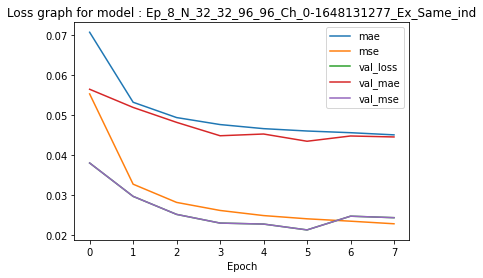

In [7]:
Plotting.Plot_loss_model(save = False, ind = 2, Epoch = 8, Ocean = OcT, Neur = '32_32_96_96', 
                         Drop = '', Extra_n = 'Same_ind', Forbid_key = ['loss']) 

Ben
['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind']


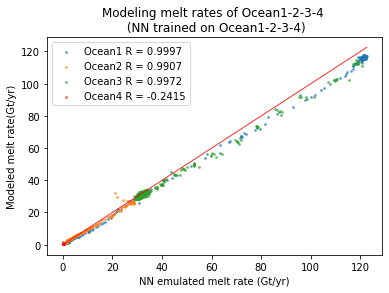

1.671492786713764


In [3]:
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False, 
        Save_name = 'No_scaling_method4', message = 0, Ocean_target = OcT, index = 1, 
        NN_attributes = {'Epoch' : 30 , 'Ocean' : OcT, 'Exact' : True, 
        'Scaling_lr' : False})

def Hyp_param_list(Ind, Max):
    List =['1', '4', '8','16', '32', '64', '96', '128']
    string = []
    Possible = List[min(6, 3 * Ind + int(Max)) :min(int(Max/ 1.5) + 3 + 2 * Ind, len(List))]
    if Ind == Max:
        return Possible
    else:
        Next = Hyp_param_list(Ind + 1, Max)
        return ['_'.join([j, i]) for i in Next for j in Possible]
li = []
for i in range(3):
    li.extend(Hyp_param_list(0, i))
li

In [94]:
def Verify_string_tuple(Seqs, extent):
    List = ['1', '4', '8','16', '32', '64', '96', '128']
    seqsT = list(Seqs)
    Min = int(Seqs[0][0])
    for ind, seq in enumerate(Seqs):
        removed = 0
        int_list = [int(i) for i in seq]
        Max = int_list[0]
        for ints in int_list:
            if ints<Max:
                seqsT.remove(seq)
                removed = 1
                break
            else:
                Max = ints
        if extent >= 3 and removed == 0:
            if int_list.count(Min) < int(extent)/2 and int_list.count(Min)!=0:
                seqsT.remove(seq)
    return seqsT
            
def Hyp2(Extent):
    List = ['1', '4', '8','16', '32', '64', '96', '128'] 
    li = List[min(Extent-1 + int(Extent/2), min(len(List)-2, len(List) - 4 + int(Extent/5))):Extent + 3 + int(2/Extent) + int(Extent/5)]
    permut = list(itertools.product(li, repeat = Extent))
    Seq = Verify_string_tuple(permut, Extent)
    return ['_'.join(i) for i in Seq]

Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind


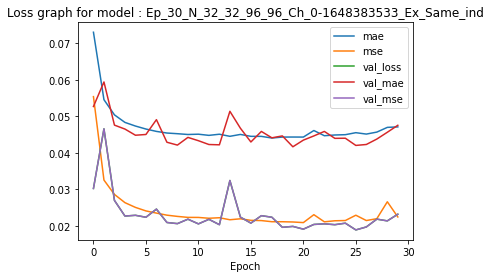

In [3]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
Plotting.Plot_loss_model(save = False, ind = 0, Epoch = 30, Ocean = OcT, Neur = '32_32_96_96', 
                         Drop = '', Extra_n = 'Same_ind', Forbid_key = ['loss']) 

Ep_30_N_96_96_96_96_96_Ch_0-1649246729_Ex_Same_ind


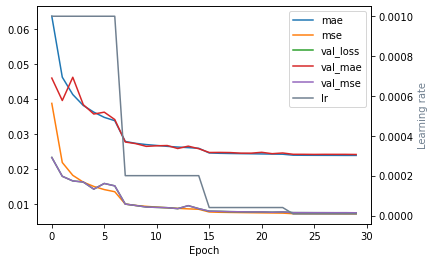

In [18]:
Data = Plotting.Plot_loss_model(save = True, ind = 1, Epoch = 30, Ocean = OcT, Neur = '96_96_96_96_96', 
                         Second_axis = ['lr'], Extra_n = 'Same_ind', Forbid_key = ['loss'], Title = False, Var = Var_X_BIG_Extra) 

Ep_45_N_96_96_96_96_96_Ch_0-1649325489_Ex_Same_ind


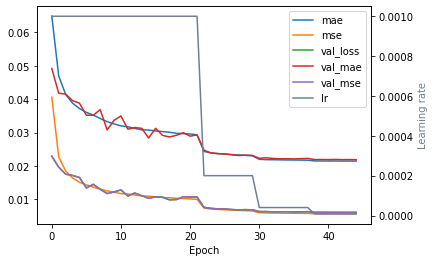

In [10]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
Data = Plotting.Plot_loss_model(save = False, ind = 2, Epoch = 45, Ocean = OcT, Neur = '96_96_96_96_96', 
                        Second_axis = ['lr'], Forbid_key = ['loss'], Title = False, Var = Var_X_BIG_Extra)

In [27]:
p = '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_45_N_96_96_96_96_96_Ch_0-1649325489_Ex_Same_ind'
p = '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_45_N_96_96_96_96_96_Ch_0-1649333441_Ex_Same_ind/'

mod = tf.keras.models.load_model(p + '/model_1.h5')
mod.summary()
print(mod.layers[1].rate)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                8544      
_________________________________________________________________
dropout (Dropout)            (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                9312      
_________________________________________________________________
dropout_1 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 96)                9312      
_________________________________________________________________
dropout_2 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 96)                9

In [23]:
mod = tf.keras.models.load_model(p + '/model_15.h5')
mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                8544      
_________________________________________________________________
dense_1 (Dense)              (None, 96)                9312      
_________________________________________________________________
dense_2 (Dense)              (None, 96)                9312      
_________________________________________________________________
dense_3 (Dense)              (None, 96)                9312      
_________________________________________________________________
dense_4 (Dense)              (None, 96)                9312      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 97        
Total params: 45,889
Trainable params: 45,889
Non-trainable params: 0
____________________________________________________

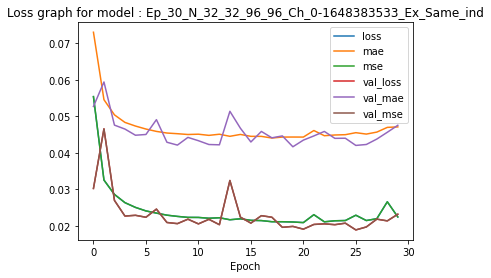

In [31]:
Plotting.Plot_loss_model(save = False, ind = 0, Epoch = 30, Ocean = OcT, Neur = '32_32_96_96')

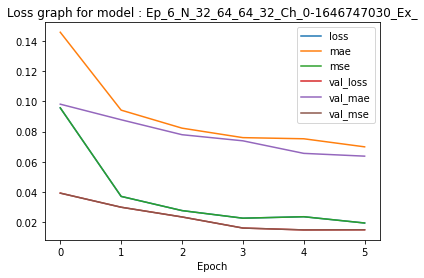

In [4]:
Plotting.Plot_loss_model(save = False, ind = 1, Epoch = 6, Ocean = 'Ocean1', 
                    Neur = '32_64_64_32') 

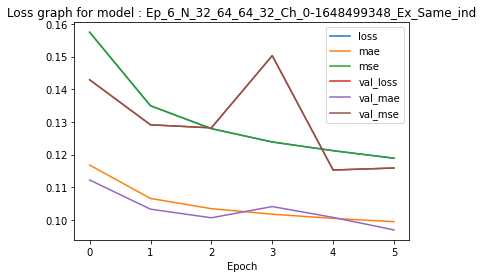

In [12]:
Plotting.Plot_loss_model(save = False, ind = 1, Epoch = 6, Ocean = OcT, 
                    Neur = '32_64_64_32', Method_data = 3) 

In [ ]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False, message = 0, 
    Ocean_target = OcT, NN_attributes = {'Epoch':8, 'Neur' : '64_64_64_96_96', 'Extra_n' : 'Same_ind', 'Ocean':OcT},index = 0, Compute_at_ind = True)

Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind
Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind
Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind
Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind


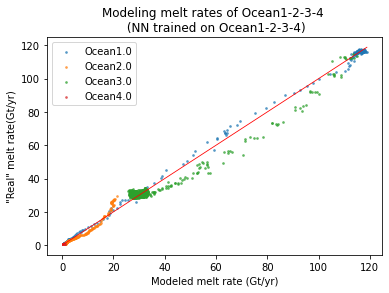

In [11]:
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = False, Epoch = 8, 
                Ocean_trained = OcT, message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                                                        'Extra_n' : 'Same_ind'}, Compute_at_ind = False)

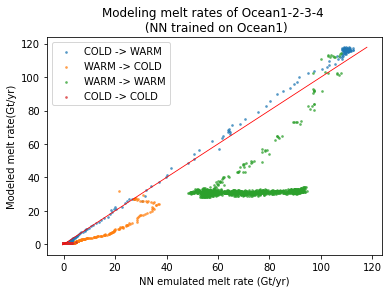

64_64_64_96_96_TrOcean1_TarOcean1-2-3-4_1647526567.png


In [45]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 8, 
                Ocean_trained = 'Ocean1', message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                'Extra_n' : 'Same_ind', 'Exact' : 1, 'Var' : Var_X_non_position}, Compute_at_ind = False)

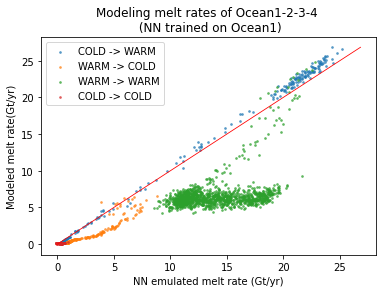

64_64_64_96_96_TrOcean1_TarOcean1-2-3-4_1647526618.png


In [46]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 8, 
                Ocean_trained = 'Ocean1', message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                'Extra_n' : 'Same_ind', 'Exact' : 1, 'Var' : Var_X_non_position}, Compute_at_ind = True)

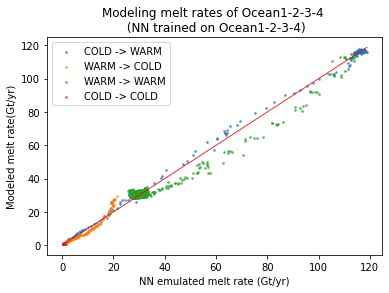

64_64_64_96_96_TrOcean1-2-3-4_TarOcean1-2-3-4_1647526690.png


In [47]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 8, 
                Ocean_trained = OcT, message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                'Extra_n' : 'Same_ind', 'Exact' : 1, 'Var' : Var_X_non_position}, Compute_at_ind = False)

In [38]:
Dict = {'Ocean1' : 'COLD -> WARM', 'Ocean2' : 'WARM -> COLD', 'Ocean3' : 'WARM -> WARM', 'Ocean4' : 'COLD -> COLD'}

In [43]:
Dict['Ocean1']

'COLD -> WARM'

In [5]:
Trainings.Get_model_path_json(Epoch = 8, Method_data = 4, Ocean = OcT)

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648077975_Ex_Same_ind']

In [6]:
p = '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648077975_Ex_Same_ind'
df = pd.read_pickle(f"{p}/MeanX.pkl")